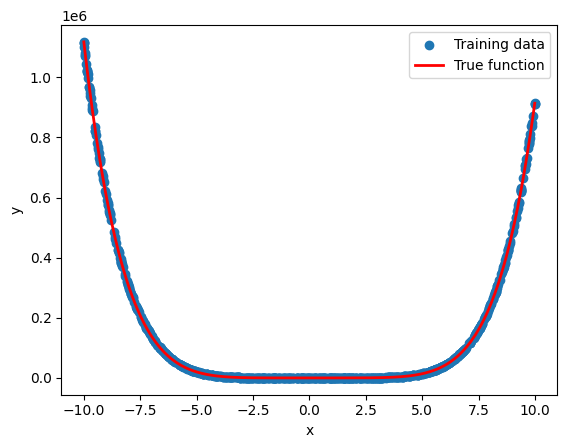

In [ ]:
import numpy as np

N = 1000  # Number of data points
x_values = np.random.uniform(-10, 10, N)

def true_function(x):
    a, b, c, d, e, f, g = 1, -1, 2, 1, 4, 2, -2
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

# Coefficients for the polynomial
a, b, c, d, e, f, g = 1, -1, 2, 1, 4, 2, -2  # Example coefficients
y = a*x_values**6 + b*x_values**5 + c*x_values**4 + d*x_values**3 + e*x_values**2 + f*x_values + g
noise = np.random.normal(0, 2, N)  # Mean 0, standard deviation 2
y_noisy = y + noise

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_values, y_noisy, test_size=0.2, random_state=42)

import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, label='Training data')
plt.plot(np.sort(x_values), true_function(np.sort(x_values)), color='r', linewidth=2, label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


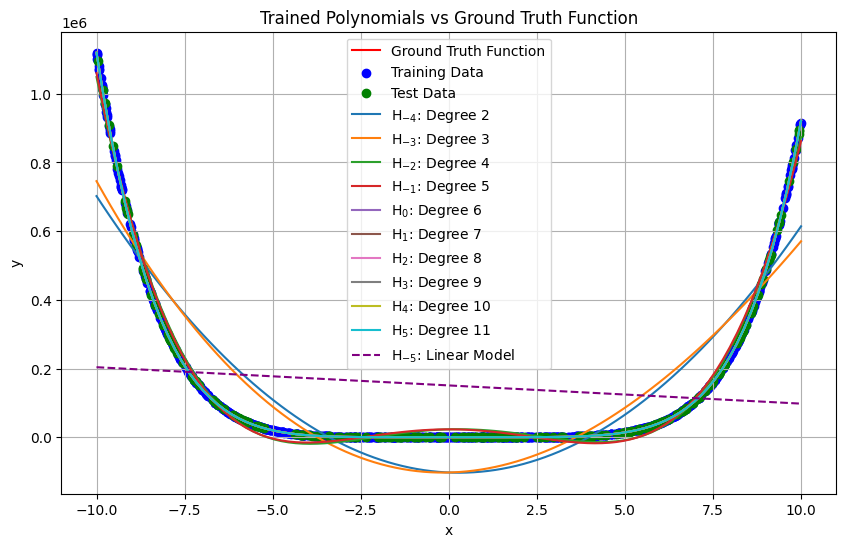

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some data points for plotting the ground truth function
x_values = np.linspace(-10, 10, 100)
y_values_ground_truth = true_function(x_values)

# Define degrees of polynomial models
degrees = range(2, 12)

# Plot the ground truth function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_ground_truth, color='red', label='Ground Truth Function')

# Plot the training and test data points
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')

# Iterate over polynomial degrees
for degree in degrees:
    # Instantiate polynomial features transformer
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x_values.reshape(-1, 1))

    # Instantiate and fit the model
    model = LinearRegression()
    model.fit(x_poly, y_values_ground_truth)

    # Make predictions
    predictions = model.predict(x_poly)

    # Calculate the MSE for the model
    mse = mean_squared_error(y_values_ground_truth, predictions)

    # Plot the trained polynomial curve
    plt.plot(x_values, predictions, label=r'H$_{%d}$' % (degree - 6) + ': Degree ' + str(degree))

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train.reshape(-1, 1), y_train)
linear_predictions = linear_model.predict(x_values.reshape(-1, 1))

# Plot the linear regression line
plt.plot(x_values, linear_predictions, color='purple', linestyle='--', label=r'H$_{-5}$' + ': Linear Model ')
# Add labels, title, legend, and grid
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Polynomials vs Ground Truth Function')
plt.legend()
plt.grid(True)
plt.show()


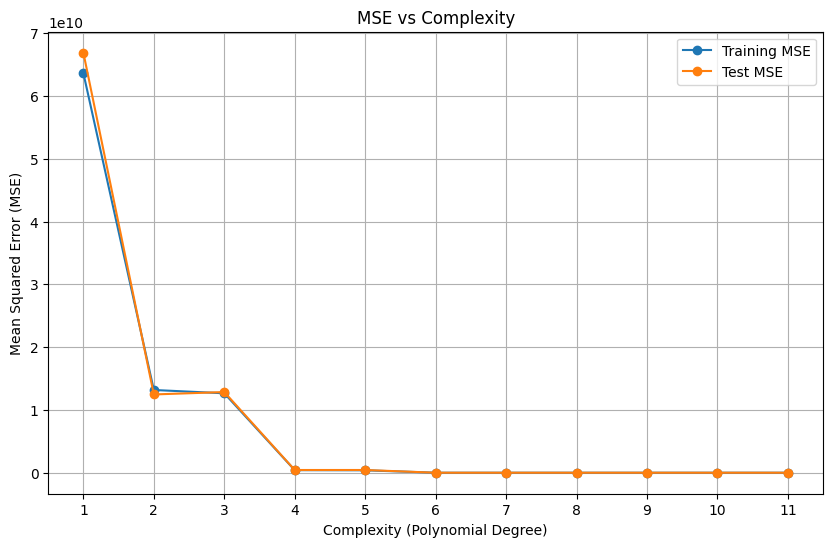

In [ ]:
x_train_reshaped = x_train.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)

# Define degrees of polynomial models
degrees = range(1, 12)

# Initialize lists to store MSE values for training and test datasets
mse_train_values = []
mse_test_values = []

# Iterate over polynomial degrees
for degree in degrees:
    # Instantiate polynomial features transformer
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train_reshaped)
    x_test_poly = poly_features.transform(x_test_reshaped)

    # Instantiate and fit the model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Make predictions
    predictions_train = model.predict(x_train_poly)
    predictions_test = model.predict(x_test_poly)

    # Calculate the MSE for both training and test datasets
    mse_train = mean_squared_error(y_train, predictions_train)
    mse_test = mean_squared_error(y_test, predictions_test)

    # Append MSE values to the lists
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plot MSE vs Complexity
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_train_values, marker='o', label='Training MSE')
plt.plot(degrees, mse_test_values, marker='o', label='Test MSE')
plt.xlabel('Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Complexity')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Reshape the input data
x_train_reshaped = x_train.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)

# Define degrees of polynomial models
degrees = range(1, 12)

# Initialize lists to store MSE values for training and test datasets
mse_train_values = []
mse_test_values = []

# Iterate over polynomial degrees
for degree in degrees:
    # Instantiate polynomial features transformer
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train_reshaped)
    x_test_poly = poly_features.transform(x_test_reshaped)

    # Instantiate and fit the model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Make predictions
    predictions_train = model.predict(x_train_poly)
    predictions_test = model.predict(x_test_poly)

    # Calculate the MSE for both training and test datasets
    mse_train = mean_squared_error(y_train, predictions_train)
    mse_test = mean_squared_error(y_test, predictions_test)

    # Append MSE values to the lists
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Print the table headers
print(f"{'Complexity (Polynomial Degree)':<30} {'Training MSE':<20} {'Test MSE':<20}")
print('-' * 70)

# Print the table data
for degree, mse_train, mse_test in zip(degrees, mse_train_values, mse_test_values):
    print(f"{degree:<30} {mse_train:12.2e} {mse_test:12.2e}")

Complexity (Polynomial Degree) Training MSE         Test MSE            
----------------------------------------------------------------------
1                                  6.36e+10     6.69e+10
2                                  1.32e+10     1.25e+10
3                                  1.26e+10     1.28e+10
4                                  4.07e+08     4.32e+08
5                                  3.85e+08     4.33e+08
6                                  3.66e+00     4.16e+00
7                                  3.65e+00     4.19e+00
8                                  3.64e+00     4.16e+00
9                                  3.64e+00     4.16e+00
10                                 3.64e+00     4.14e+00
11                                 3.63e+00     4.14e+00


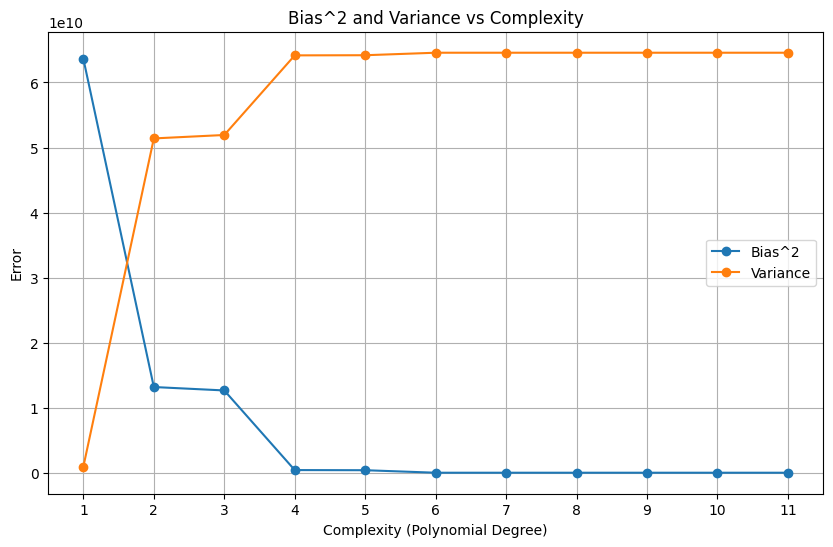

In [ ]:
# Reshape the input data
x_train_reshaped = x_train.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)

# Define degrees of polynomial models
degrees = range(1, 12)

# Initialize lists to store bias^2 and variance values
bias_squared_values = []
variance_values = []

# Iterate over polynomial degrees
for degree in degrees:
    # Instantiate polynomial features transformer
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train_reshaped)
    x_test_poly = poly_features.transform(x_test_reshaped)

    # Instantiate and fit the model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Make predictions
    predictions_train = model.predict(x_train_poly)

    # Calculate Bias^2
    bias_squared = np.mean((predictions_train - y_train) ** 2)

    # Calculate Variance
    variance = np.mean(np.var(predictions_train))

    # Append bias^2 and variance values to the lists
    bias_squared_values.append(bias_squared)
    variance_values.append(variance)

# Plot Bias^2 and Variance vs Complexity Curves
plt.figure(figsize=(10, 6))
plt.plot(degrees, bias_squared_values, marker='o', label='Bias^2')
plt.plot(degrees, variance_values, marker='o', label='Variance')
plt.xlabel('Complexity (Polynomial Degree)')
plt.ylabel('Error')
plt.title('Bias^2 and Variance vs Complexity')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()